In [267]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
%matplotlib inline

NBA_DF = pd.DataFrame(pd.read_csv
                            ('/Users/MattPettit/Downloads/national-basketball-associationnba-dataset/NBA_train.csv'))
NBA_DF

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,13,75,2038,2645,1369,2406,1913,782,539,1495
1,1980,Boston Celtics,1,61,9303,8664,3617,7387,3455,6965,162,422,1907,2449,1227,2457,2198,809,308,1539
2,1980,Chicago Bulls,0,30,8813,9035,3362,6943,3292,6668,70,275,2019,2592,1115,2465,2152,704,392,1684
3,1980,Cleveland Cavaliers,0,37,9360,9332,3811,8041,3775,7854,36,187,1702,2205,1307,2381,2108,764,342,1370
4,1980,Denver Nuggets,0,30,8878,9240,3462,7470,3379,7215,83,255,1871,2539,1311,2524,2079,746,404,1533
5,1980,Detroit Pistons,0,16,8933,9609,3643,7596,3586,7377,57,219,1590,2149,1226,2415,1950,783,562,1742
6,1980,Golden State Warriors,0,24,8493,8853,3527,7318,3500,7197,27,121,1412,1914,1155,2437,2028,779,339,1492
7,1980,Houston Rockets,1,41,9084,9070,3599,7496,3495,7117,104,379,1782,2326,1394,2217,2149,782,373,1565
8,1980,Indiana Pacers,0,37,9119,9176,3639,7689,3551,7375,88,314,1753,2333,1398,2326,2148,900,530,1517
9,1980,Kansas City Kings,1,47,8860,8603,3582,7489,3557,7375,25,114,1671,2250,1187,2429,2123,863,356,1439


In [257]:
RandFor =  RandomForestRegressor(max_depth=5)
RandFor.fit(NBA_DF.iloc[:,3:17], NBA_DF.iloc[:,0])

/Users/MattPettit/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

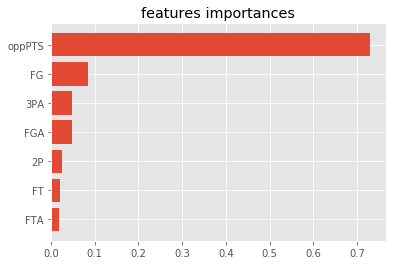

In [278]:
features = NBA_DF.columns
importances = RandFor.feature_importances_
indices = np.argsort(importances)[-7:]
plt.barh(range(len(indices)), importances[indices])
plt.title('features importances')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.show()

In [285]:
NBA_FeatImp = NBA_DF[['oppPTS', 'FG', '3PA', 'FT', 'FGA', '2P', 'FTA', 'W']]

In [286]:
NBA_FeatImp.corr()

,oppPTS,FG,3PA,FT,FGA,2P,FTA,W
oppPTS,1.000000,0.804467,-0.563329,0.550588,0.830879,0.769841,0.537215,-0.331573
FG,0.804467,1.000000,-0.688763,0.538343,0.879663,0.942920,0.521217,0.190396
3PA,-0.563329,-0.688763,1.000000,-0.517850,-0.605596,-0.888600,-0.537783,0.083286
FT,0.550588,0.538343,-0.517850,1.000000,0.391691,0.574294,0.950493,0.204906
FGA,0.830879,0.879663,-0.605596,0.391691,1.000000,0.838275,0.382122,-0.071446
2P,0.769841,0.942920,-0.888600,0.574294,0.838275,1.000000,0.574543,0.069279
FTA,0.537215,0.521217,-0.537783,0.950493,0.382122,0.574543,1.000000,0.161887
W,-0.331573,0.190396,0.083286,0.204906,-0.071446,0.069279,0.161887,1.000000


In [303]:
NBA = NBA_FeatImp.drop(columns=(['FTA', '2P', 'FGA']))

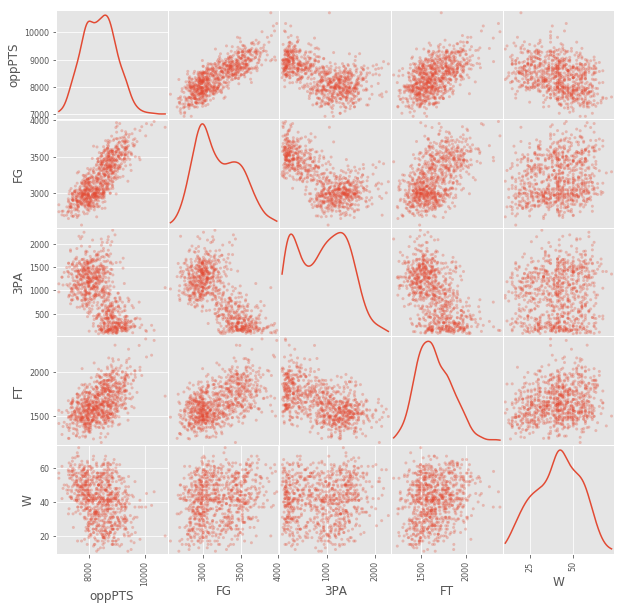

In [288]:
plt.style.use('ggplot')
scatter_matrix(NBA, alpha=.3, figsize=(10,10), diagonal='kde')
plt.show()

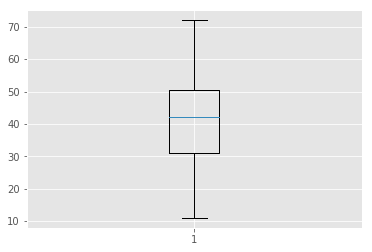

In [289]:
plt.boxplot(NBA['W'])
plt.show()

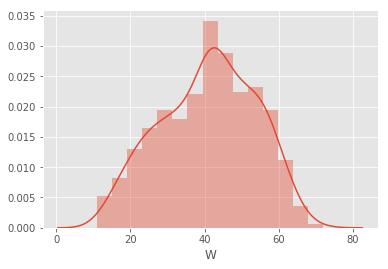

In [290]:
sns.distplot(NBA['W'])

In [298]:
X = pd.DataFrame(NBA.iloc[:,0:4])
y = pd.DataFrame(NBA.iloc[:,4])

In [299]:
model = sm.OLS(y, X)

In [300]:
results = model.fit()

In [301]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 2.834e+04
Date:                Sun, 07 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:30:49   Log-Likelihood:                -2268.8
No. Observations:                 835   AIC:                             4546.
Df Residuals:                     831   BIC:                             4564.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
oppPTS        -0.0308      0.000    -89.720      0.000      -0.032      -0.030
FG             0.0706      0.001     86.521      0.000       0.069       0.072
3PA            0.0164      0.000     65.965      0.000       0.016       0.017
FT             0.0351      0.001     44.309      0.000       0.034       0.037
==============================================================================
Omnibus:                        0.318   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.853   Jarque-Bera (JB):                0.388
Skew:                          -0.040   Prob(JB):                        0.824
Kurtosis:                       2.932   Cond. No.                         63.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [302]:
inflation = pd.DataFrame()
inflation['VIF'] = [vif(X.values, i) for i in range(X.shape[1])]
inflation["features"] = X.columns
inflation

,VIF,features
0,514.993454,oppPTS
1,425.984471,FG
2,4.265496,3PA
3,107.472799,FT


In [308]:
NBA_test_DF = pd.DataFrame(pd.read_csv
                        ('/Users/MattPettit/Downloads/national-basketball-associationnba-dataset/NBA_test.csv'))
NBA_test = NBA_test_DF[['oppPTS', 'FG', '3PA', 'FT', 'W']]

In [312]:
y_test = NBA_test.iloc[:,4]
x_test = NBA_test.iloc[:,0:4]

In [313]:
pred = results.predict(x_test)

In [314]:
rmse = np.sqrt(mean_squared_error(y_test, pred))
rmse

4.133002172727066

In [315]:
Log_X = pd.DataFrame(np.log(X))
Log_y = pd.DataFrame(np.log(y))

In [316]:
model_log = sm.OLS(y, Log_X)
results_log = model_log.fit()

In [317]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.831e+04
Date:                Sun, 07 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:33:31   Log-Likelihood:                -2449.5
No. Observations:                 835   AIC:                             4907.
Df Residuals:                     831   BIC:                             4926.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
oppPTS      -244.3749      3.286    -74.364      0.000    -250.825    -237.925
FG           223.0889      3.397     65.667      0.000     216.421     229.757
3PA            9.9932      0.224     44.689      0.000       9.554      10.432
FT            51.6499      1.642     31.449      0.000      48.426      54.874
==============================================================================
Omnibus:                        2.538   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.448
Skew:                           0.131   Prob(JB):                        0.294
Kurtosis:                       3.036   Cond. No.                         458.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [318]:
inflation_log = pd.DataFrame()
inflation_log['VIF'] = [vif(Log_X.values, i) for i in range(Log_X.shape[1])]
inflation_log["features"] = Log_X.columns
inflation_log

,VIF,features
0,35386.140256,oppPTS
1,30184.802735,FG
2,88.156532,3PA
3,5939.773025,FT


In [319]:
pred_log = results_log.predict(np.log(x_test))

In [320]:
rmse_log = np.sqrt(mean_squared_error(y_test, pred_log))
rmse_log

4.75236823267214